## Simple Linear Regression

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets as datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [8]:
import sys
print(sys.version)

3.6.6 (v3.6.6:4cf1f54eb7, Jun 26 2018, 17:02:57) 
[GCC 4.2.1 (Apple Inc. build 5666) (dot 3)]


### The Boston Housing Dataset

The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:

* CRIM - per capita crime rate by town
* ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS - proportion of non-retail business acres per town.
* CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX - nitric oxides concentration (parts per 10 million)
* RM - average number of rooms per dwelling
* AGE - proportion of owner-occupied units built prior to 1940
* DIS - weighted distances to five Boston employment centres
* RAD - index of accessibility to radial highways
* TAX - full-value property-tax rate per `$10,000`
* PTRATIO - pupil-teacher ratio by town
* B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* LSTAT - % lower status of the population
MEDV - Median value of owner-occupied homes in $1000's

In [70]:
boston_data_path = "/Users/alifakeri/Documents/IK/LinAlg/Boston.csv"

In [12]:
# reading the dataset
df = pd.read_csv(boston_data_path)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [71]:
# checking the chape of dataset
df.shape

(506, 13)

In [72]:
Y = df['MEDV']
X = df[['RM']]

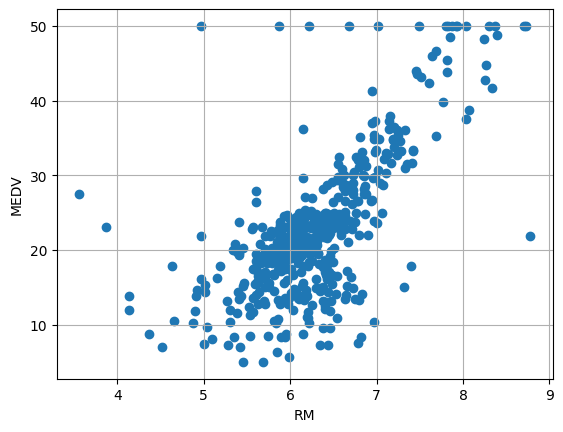

In [73]:
# visualizing the data
plt.scatter(X, Y)
plt.xlabel('RM')
plt.ylabel('MEDV')
plt.grid(True)
plt.show()

In [74]:
# splitting training and testing data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.75 , random_state = 0)

In [75]:
# applying Linear Regression
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [76]:
# printing the coefficients
# ypred = a + b * x
print('a = ', model.intercept_)
print('b = ', model.coef_)

a =  -36.180992646339206
b =  [9.31294923]


In [77]:
# Making predictions on the test set
Y_pred = model.predict(X_test)
Y_pred.shape

(127,)

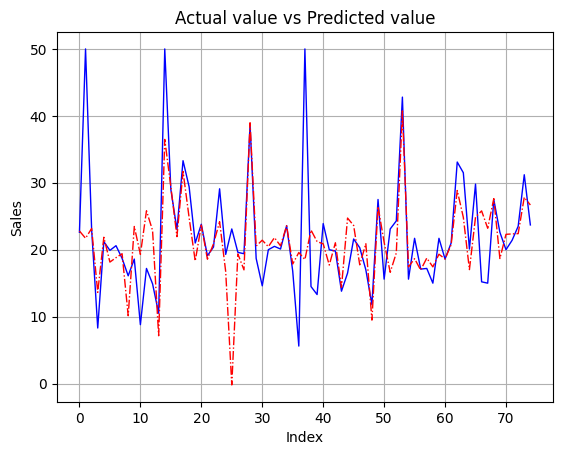

In [78]:
# visualizing the predictions
plt.plot([x for x in range(Y_test.shape[0])][:75], Y_test[:75], color = "blue", linewidth = 1, linestyle = "-")
plt.plot([x for x in range(Y_test.shape[0])][:75], Y_pred[:75], color = "red",  linewidth = 1, linestyle = "-.")
plt.title('Actual value vs Predicted value')
plt.xlabel('Index')
plt.ylabel('Sales')
plt.grid(True)

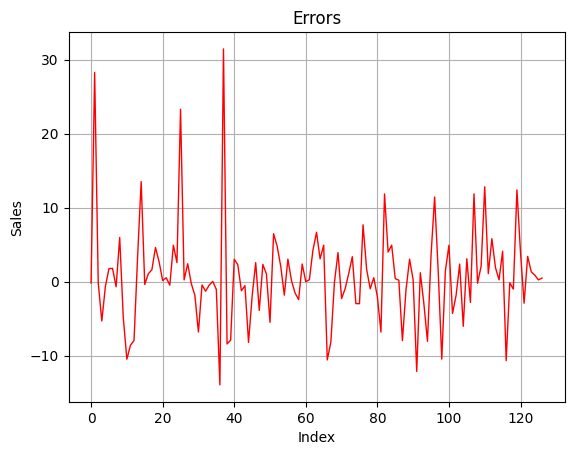

In [79]:
# visualizing the error terms
plt.plot([x for x in range(Y_test.shape[0])], Y_test - Y_pred, color = "red", linewidth = 1, linestyle = "-")
plt.title('Errors')
plt.xlabel('Index')
plt.ylabel('Sales')
plt.grid(True)

In [81]:
# mean squared error computation
mse = mean_squared_error(Y_test, Y_pred)
print(mse)

43.472041677202206


In [82]:
# r2 value computation
r2 = r2_score(Y_test, Y_pred)
print(r2)

0.4679000543136781


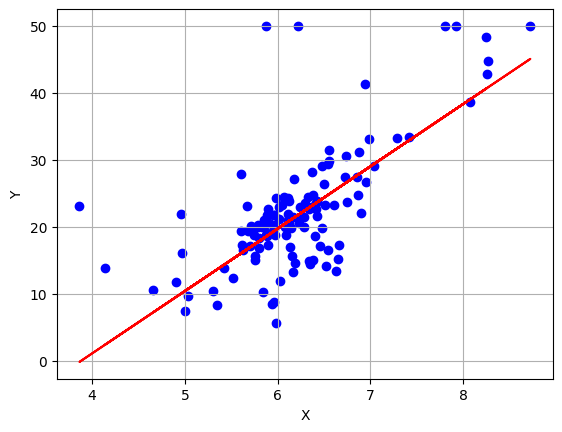

In [83]:
plt.scatter(X_test, Y_test, c = 'blue')
plt.plot(X_test, Y_pred, c = 'red')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()
plt.show()